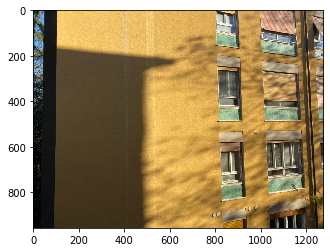

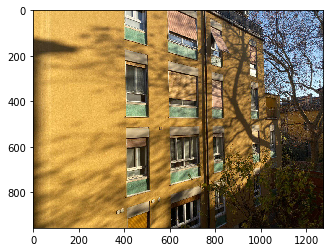

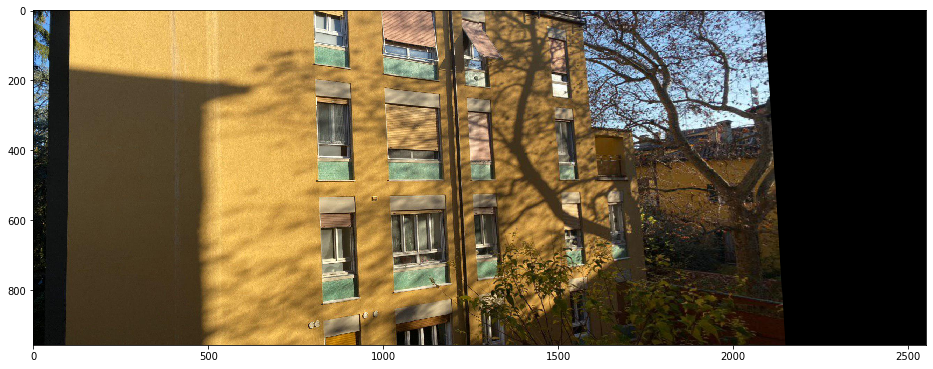

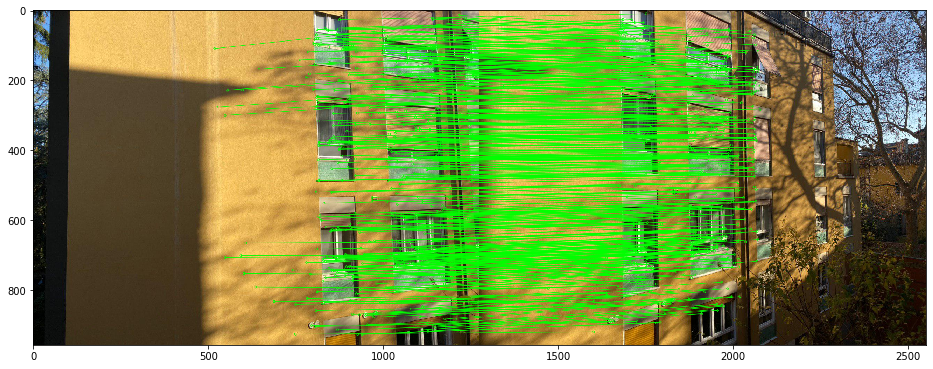

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('ex/panorama_left_rgb.jpg')[:,:,::-1] 
img2 = cv2.imread('ex/panorama_right_rgb.jpg')[:,:,::-1]
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

sift = cv2.xfeatures2d.SIFT_create()
kp1 = sift.detect(img1)
kp2 = sift.detect(img2)
kp1, des1 = sift.compute(img1, kp1)
kp2, des2 = sift.compute(img2, kp2)
    
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

result = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], img2.shape[0]))
result[0:img1.shape[0], 0:img1.shape[1]] = img1
plt.figure(figsize=(16,8))
plt.imshow(result)
plt.show()

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(16,8))
plt.imshow(img3)
plt.show()    

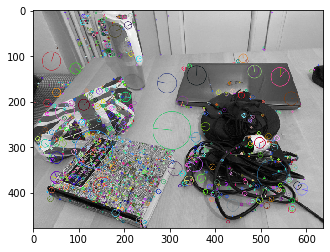

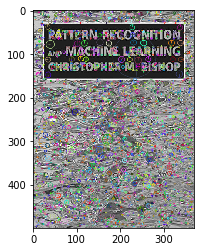

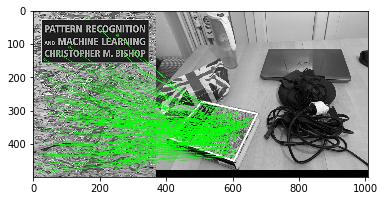

In [84]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_train = cv2.imread('ex/scene1.jpg',0) # trainImage
img_query = cv2.imread('ex/bishop.jpg',0) # queryImage

sift = cv2.xfeatures2d.SIFT_create()
kp_query = sift.detect(img_query)
kp_train = sift.detect(img_train)
kp_query, des_query = sift.compute(img_query, kp_query)
kp_train, des_train = sift.compute(img_train, kp_train)

img_visualization = cv2.drawKeypoints(img_train,kp_train,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_visualization)
plt.show()

img_visualization = cv2.drawKeypoints(img_query,kp_query,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_visualization)
plt.show()

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des_query,des_train,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_train[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img_query.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img_train = cv2.polylines(img_train,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img_query,kp_query,img_train,kp_train,good,None,**draw_params)
plt.imshow(img3, 'gray')
plt.show()

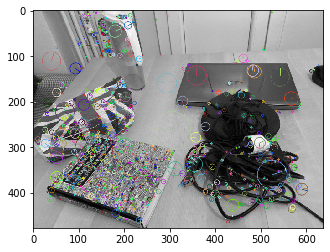

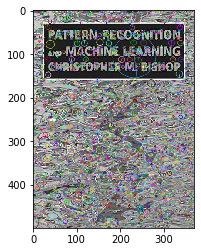

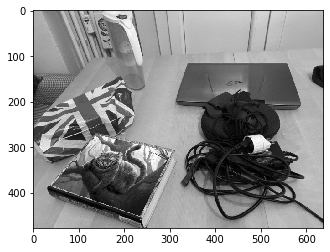

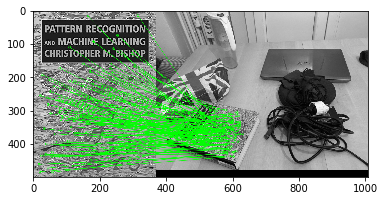

In [83]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_train = cv2.imread('ex/scene1.jpg',0) # trainImage
img_query = cv2.imread('ex/bishop.jpg',0) # queryImage
img_ar = cv2.imread('ex/stregatto.jpg',0) # queryImage

# For a better visualization in this scene image. Try to find the best rotation dynamically.
img_ar = np.rot90(img_ar, 3) #rotate 270

sift = cv2.xfeatures2d.SIFT_create()
kp_query = sift.detect(img_query)
kp_train = sift.detect(img_train)
kp_query, des_query = sift.compute(img_query, kp_query)
kp_train, des_train = sift.compute(img_train, kp_train)

img_visualization = cv2.drawKeypoints(img_train,kp_train,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_visualization)
plt.show()

img_visualization = cv2.drawKeypoints(img_query,kp_query,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_visualization)
plt.show()

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des_query,des_train,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_train[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img_query.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    
    h_t, w_t = img_train.shape
    h,w = img_ar.shape
    pts_stregatto = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    
    # Compute the perspective transform matrix 
    M = cv2.getPerspectiveTransform(pts_stregatto,dst)
    # Apply the transformation matrix 
    warped = cv2.warpPerspective(img_ar, M, (w_t, h_t))

    # Warp a white mask to understand what are the black pixels
    white = np.ones([h,w],dtype=np.uint8)*255
    warp_mask = cv2.warpPerspective(white, M, (w_t, h_t))
    warp_mask = np.equal(warp_mask, 0)
    # Restore previous values
    warped[warp_mask] = img_train[warp_mask]
    plt.imshow(warped,'gray',vmin=0,vmax=255)
    plt.show()
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img_query,kp_query,img_train,kp_train,good,None,**draw_params)
plt.imshow(img3, 'gray')
plt.show()

Found query object in ex/scene1.jpg:True


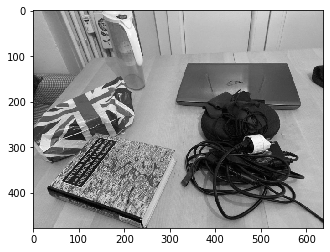

Found query object in ex/scene2.jpg:True


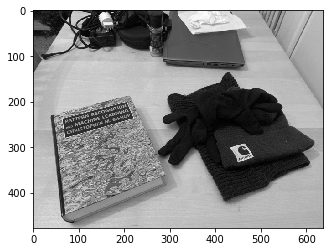

Found query object in ex/scene3.jpg:True


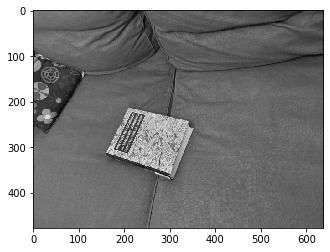

Found query object in ex/scene4.jpg:False
Found query object in ex/scene5.jpg:False


In [81]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def object_retrieve(img_query, img_train, min_match_count):
    sift = cv2.xfeatures2d.SIFT_create()
    kp_query = sift.detect(img_query)
    kp_train = sift.detect(img_train)
    kp_query, des_query = sift.compute(img_query, kp_query)
    kp_train, des_train = sift.compute(img_train, kp_train)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des_query,des_train,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good)>min_match_count:
        return len(good)
    else:
        return -1

img_query = cv2.imread('ex/bishop.jpg',0) # queryImage
imgs_train = ['ex/scene1.jpg', 'ex/scene2.jpg', 'ex/scene3.jpg', 'ex/scene4.jpg', 'ex/scene5.jpg']

for path in imgs_train:
    img_train = cv2.imread(path,0)
    found = object_retrieve(img_query, img_train, 50)
    print("Found query object in {}:{}".format(path,found > 0))
    if found > 0:
        plt.imshow(img_train, 'gray', vmin= 0, vmax=255)
        plt.show()